In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from scipy.optimize import minimize

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
sns.set_style('darkgrid')

In [6]:
np.random.seed(11)
N = 500
x = 10 + 2*np.random.randn(N)
y = 5 + x + np.random.randn(N)
df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1

df.head()

,y,x,constant
0,19.699080,13.498909,1
1,13.942720,9.427854,1
2,15.094420,9.030870,1
3,8.428367,4.693363,1
4,14.927912,9.983431,1


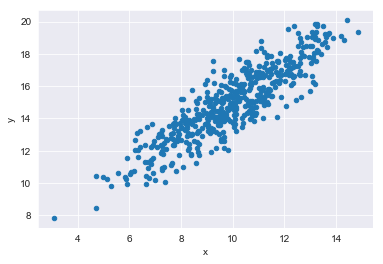

In [23]:
df.plot.scatter('x','y')

To fit a linear model to this data we generally minimize the sum of square errors.

In [10]:
def SS(coefs, x, y):
    m,b = coefs
    yhat = m*x + b
    err = y - yhat
    return (err**2).sum()

seed = [1,1]
res = minimize(SS, seed, args=(x,y))
res

      fun: 536.551529551926
 hess_inv: array([[ 0.00026335, -0.00261616],
       [-0.00261616,  0.0269889 ]])
      jac: array([7.62939453e-06, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 4
     njev: 9
   status: 0
  success: True
        x: array([0.99802171, 5.03871866])

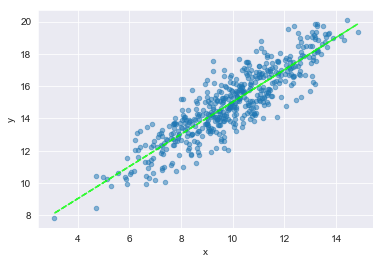

In [24]:
# resulting coefficient and constant
m,b = res.x

df.plot.scatter('x','y', alpha=0.5)
plt.plot(x, m*x+b, '--', color = 'lime', alpha=0.78)

Maximum Likelihood Estimation is the same idea as what we did above. The difference is that instead of simply finding parameters to minimize the sum of squares - we are finding the parameters for _the distribution_ of y|x that maximize the probability of the obeserved data.

Since we are minimizing an objective function, maximizing the likelihood is the same as minimizing the negative likelihood.

For a normal distribution the function we are maximizing is the normal probability density function

$ P(x|\mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-{\frac{(x-\overline{x})^2}{2\sigma^2}}} $

Lastly, since the total likelihood of all the observations is a _product_ of their individual likelihoods, and since the product of a bunch of fractions between 0 and 1 is a __very__ small fraction, we instead use the log of the likelihood. Because of the properties of logarithms, this allows us to take a sum of the individual log-likelihoods resulting in a much more manageable number. This makes the function much easier to differentiate and to find the maximum/minimum!

$ ln(P(x|\mu,\sigma)) = ln(\frac{1}{\sigma\sqrt{2\pi}})-\frac{(x-\overline{x})^2}{2\sigma^2} $

In [32]:
def neg_loglike(theta, x, y):
    # generate a normal distribution for each predicted value of y
    # the models prediction is the mean of the distribution
    # standard deviation is a parameter to be optimized
    coef,const,std = theta
    mu = const + coef*x
    return -1*stats.norm(mu, std).logpdf(y).sum() 

In [33]:
seed = np.array([1,1,1])
res = minimize(neg_loglike, seed, 
               args=(x,y))

res.x # optimal coef, beta and std 

array([0.9980217 , 5.0387188 , 1.03590687])

Interpretation is - that these parameters generate a set of normal distributions that maximize the probability of seeing the observed value of y for a given value of x.

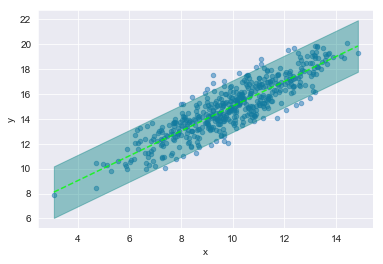

In [45]:
# resulting coefficient, constant AND standard deviation
m,b,s = res.x

# calculate ~ 95% confidence interval from standard deviation
lower = (m*x+b) - 2*s
upper = (m*x+b) + 2*s

idx = np.argsort(x)

df.plot.scatter('x','y', alpha=0.5)
plt.plot(x[idx], m*x[idx]+b,'--', color = 'lime', alpha=0.78)
plt.fill_between(x[idx], lower[idx],upper[idx], color='teal', alpha=0.4)


